### Тема “Обучение без учителя”<a class='anchor' id='start'>

* [Задание 1](#task_1)
* [Задание 2](#task_2)
* [Задание 3](#task_3)

#### Задание 1 <a class='anchor' id='task_1'>

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
title_dict_0 = {'fontsize': 20, 'fontweight': 'bold', 'color': 'DarkRed', 'family': 'Calibri'}
label_dict_0 = {'fontsize': 14, 'color': 'DarkBlue', 'family': 'Calibri'}

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
X = boston.data
y = boston.target
feature_names = boston.feature_names
X.shape, y.shape

((506, 13), (506,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform( X_train)
X_test_scaled = scaler.transform( X_test)
X_train_scaled = pd.DataFrame( X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame( X_test_scaled, columns=feature_names)

In [8]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [10]:
X_train_tsne = tsne.fit_transform( X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

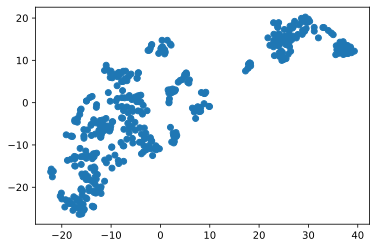

In [11]:
plt.scatter( X_train_tsne[:, 0], X_train_tsne[:, 1])

[ОГЛАВЛЕНИЕ](#start)

#### Задание 2 <a class='anchor' id='task_2'>

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [14]:
labels_train = kmeans.fit_predict( X_train_scaled)

In [15]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

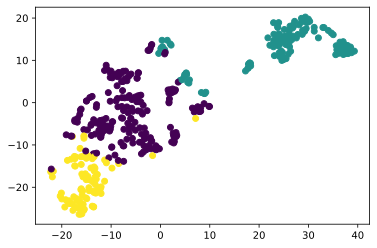

In [16]:
plt.scatter( X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [17]:
for i in range(3):
    print(f'cluster {i} price mean: {y_train[labels_train==i].mean()}')
print()
for i in range(3):
    print(f'cluster {i} crime mean: {X_train.loc[labels_train==i, "CRIM"].mean()}')

cluster 0 price mean: 24.958115183246072
cluster 1 price mean: 16.165354330708663
cluster 2 price mean: 27.78837209302326

cluster 0 crime mean: 0.42166020942408367
cluster 1 crime mean: 10.797028425196853
cluster 2 crime mean: 0.07356558139534886


[ОГЛАВЛЕНИЕ](#start)

#### *Задание 3 <a class='anchor' id='task_3'>

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [18]:
label_test = kmeans.predict( X_test_scaled)

In [19]:
pd.value_counts(label_test)

0    51
1    35
2    16
dtype: int64

In [20]:
for i in range(3):
    print(f'cluster {i} price mean: {y_test[label_test==i].mean()}')
print()
for i in range(3):
    print(f'cluster {i} crime mean: {X_test.loc[label_test==i, "CRIM"].mean()}')

cluster 0 price mean: 21.860784313725492
cluster 1 price mean: 16.43714285714286
cluster 2 price mean: 31.35

cluster 0 crime mean: 0.26607882352941176
cluster 1 crime mean: 10.165531142857143
cluster 2 crime mean: 0.062060000000000004


[ОГЛАВЛЕНИЕ](#start)